# Root Insurance Challenge 
## Abolfazl Setayesh & Saeed Shaker
### May 2020


## Introduction
We analyze a dataset of 10000 observations on online bids of a company in a vertical search platform to attract potential buyers of insurance.

The dataset includes characteristics of costumers, the bid value of ACME company- which is $10 for the entire dataset-, the ranking with which ACME ad is shown, whetehr costumers click on ACME ad, and whether they buy a policy. 

The goal is to maximize the number of policies sold by proposing new bid values

We first explore the dataset to find patterns that will help us choose the right machine learning algorithms to use.

We, then implement the off-the-shelf algorithms as well as our own tailored method for this application.

We, then show the results.


In [12]:
# Import packages

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

from colorama import Fore, Back, Style 


## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

Let's take a look at our data

In [13]:
acme = pd.read_excel("Acme.xlsx")
acme.head()

,impression_id,click,cost,currently_insured,number_of_vehicles,number_of_drivers,marital_status,rank,policies sold
0,1,1,10,N,1,1,M,1,1
1,2,0,10,N,2,1,M,4,0
2,3,0,10,N,1,1,S,2,0
3,4,0,10,Y,2,1,M,5,0
4,5,0,10,Y,2,2,S,4,0


In [14]:
acme.describe()

,impression_id,click,cost,number_of_vehicles,number_of_drivers,rank,policies sold
count,10000.00000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.137400,10.0,1.608300,1.416900,3.378500,0.054500
std,2886.89568,0.344286,0.0,0.488155,0.493071,1.307214,0.227013
min,1.00000,0.000000,10.0,1.000000,1.000000,1.000000,0.000000
25%,2500.75000,0.000000,10.0,1.000000,1.000000,2.000000,0.000000
50%,5000.50000,0.000000,10.0,2.000000,1.000000,3.000000,0.000000
75%,7500.25000,0.000000,10.0,2.000000,2.000000,5.000000,0.000000
max,10000.00000,1.000000,10.0,2.000000,2.000000,5.000000,1.000000


The variables to which ACME can condition its bidding value are: `currently_insured`, `number_of_vehicles`, `number_of_drivers`, `marital_status`

Note that all these variables are binary. Thus, we have only 16 separate groups and can only offer 16 different bidding values for each group.


The timeline of this game as the following: 
<ul>
    <li>ACME bids a price for each group
    <li>The rank of ACME ad is chosen based on the bid values of competitors</li>
    <li>Costumers choose whether to click on the ACME ad</li>
    <li>If they choose to click, they view the policy and choose wether they will buy a policy or not</li>
</ul>


## Data Exploration
### Whether rank -> click & sale  ?
The first hypothesis we check is whether costumers behave differently in buying policies according to the rank of ACME ad shown to them. for that, we construct a likelihood measure of a click turning into a policy sale for different ranks in which ACME ad is shown. We expect costumers not to care about the rank once they have clicked on ACME ad and, thus, we expect to reject this hypothesis.

The second hypothesis we check is whether costumers choose to click on the ads independently from the rank of ACME ad shown to them. We expect costumers to care about the rank here and thus, we expect to reject this hypothesis. 

In [15]:
# Let's check if a click turns into a successful sale independently of the rank
rank=[1,2,3,4,5]
click_likelihood=[]
click2sale_likelihood=[]
for i in range(1,6):
        click_likelihood.append(np.mean(acme['click'].loc[acme['rank'] == i]))
        click2sale_likelihood.append(np.mean(acme['policies sold'].loc[acme['rank'] == i].loc[acme['click'] == 1]))
        print('The likelihood of a click and a click turning into a sale if the rank is ',i,' are respectively: ',
              round(click_likelihood[i-1],2),' and ',
              round(click2sale_likelihood[i-1],2))

The likelihood of a click and a click turning into a sale if the rank is  1  are respectively:  0.51  and  0.45
The likelihood of a click and a click turning into a sale if the rank is  2  are respectively:  0.19  and  0.38
The likelihood of a click and a click turning into a sale if the rank is  3  are respectively:  0.15  and  0.33
The likelihood of a click and a click turning into a sale if the rank is  4  are respectively:  0.04  and  0.37
The likelihood of a click and a click turning into a sale if the rank is  5  are respectively:  0.02  and  0.47


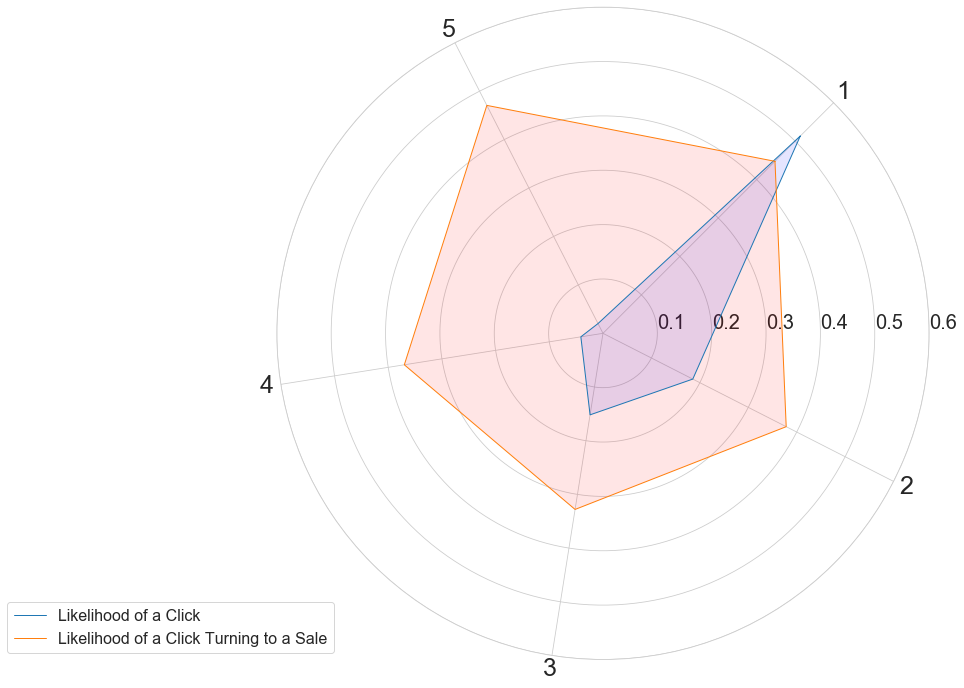

In [25]:
# A radar graph of rank, click_likelihood and click2sale_likelihood
# ------- PART 1: Create background
 
# number of variable

N = len(rank)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 4)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], rank, fontsize=16, label='Rank')
 
# Draw ylabels
ax.set_rlabel_position(45)
plt.ylim(0,0.6)
 

    
click_likelihood += click_likelihood[:1]
click2sale_likelihood += click2sale_likelihood[:1]

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
ax.plot(angles, click_likelihood, linewidth=1, linestyle='solid', label="Likelihood of a Click")
ax.fill(angles, click_likelihood, 'b', alpha=0.1)
 
# Ind2
ax.plot(angles, click2sale_likelihood, linewidth=1, linestyle='solid', label="Likelihood of a Click Turning to a Sale")
ax.fill(angles, click2sale_likelihood, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=16)

#plt.text(0, 0, 'aa',horizontalalignment='center', color='black', weight='bold',size=50)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

del click_likelihood[5]
del click2sale_likelihood[5]

As expected, the results reject the first hypothesis. Thus, hereafter, we assume likelihood of a click turning to a sale is constant and independent of the rank of ACME ad shown to the costumer and focus on building strategies to maximize the number of clicks rather than policy sales. 

Furthermore, the results reject the second hypothesis as well. In fact, the likelihood of a click if ACME ad is shown as rank is one is far larger than that shown in any other rank. The differential is what makes smart bidding a profitable strategy.

### whether Characteristics -> click & sale

Here we check whether different characteristics (being in each one the 16 groups) result in different likelihoods of click and sale. We compute the likelihood of a click, a click turning into a sale, and a sale in each group


In [6]:
# Let's check if any cluster is more likely to buy a plan
for ci in ['Y' , 'N']:
    for ms in ["M" , "S"]:
        for nv in range(1,3):
            for nd in range(1,3):
                temp1=np.mean(acme['click'].loc[acme['currently_insured'] == ci].loc[acme['marital_status'] == ms].loc[acme['number_of_vehicles'] == nv].loc[acme['number_of_drivers'] == nd])
                temp2=np.mean(acme['policies sold'].loc[acme['currently_insured'] == ci].loc[acme['marital_status'] == ms].loc[acme['number_of_vehicles'] == nv].loc[acme['number_of_drivers'] == nd].loc[acme['click'] == 1])
                temp3=np.count_nonzero(acme['policies sold'].loc[acme['currently_insured'] == ci].loc[acme['marital_status'] == ms].loc[acme['number_of_vehicles'] == nv].loc[acme['number_of_drivers'] == nd].loc[acme['click'] == 1])
                temp4=len(acme.loc[acme['currently_insured'] == ci].loc[acme['marital_status'] == ms].loc[acme['number_of_vehicles'] == nv].loc[acme['number_of_drivers'] == nd])

                
                print(Fore.GREEN +"If currently_insured=", ci,", marital_status=", ms, ", number_of_vehicles=", nv, ", and number_of_drivers=", nd,':')
                print(Fore.BLACK +"The likelihood of a click is:", round(temp1,2))
                print(Fore.RED +"The likelihood of a click turning into a sale is:", round(temp2,2))
                print(Fore.BLACK +"The likelihood of a sale is:", round(temp1*temp2,2))
                print(Fore.RED +"Total number of sales in the data is:", temp3)
                print(Fore.BLACK +"Total number of samples in the data is:", temp4)
   

If currently_insured= Y , marital_status= M , number_of_vehicles= 1 , and number_of_drivers= 1 :
The likelihood of a click is: 0.2
The likelihood of a click turning into a sale is: 0.44
The likelihood of a sale is: 0.09
Total number of sales in the data is: 64
Total number of samples in the data is: 734
If currently_insured= Y , marital_status= M , number_of_vehicles= 1 , and number_of_drivers= 2 :
The likelihood of a click is: 0.23
The likelihood of a click turning into a sale is: 0.21
The likelihood of a sale is: 0.05
Total number of sales in the data is: 29
Total number of samples in the data is: 594
If currently_insured= Y , marital_status= M , number_of_vehicles= 2 , and number_of_drivers= 1 :
The likelihood of a click is: 0.05
The likelihood of a click turning into a sale is: 0.29
The likelihood of a sale is: 0.02
Total number of sales in the data is: 32
Total number of samples in the data is: 2056
If currently_insured= Y , marital_status= M , number_of_vehicles= 2 , and number_o

Evidently, the numbers in each group are vastly different. For instance, the likelihoood of a click ranges from 0.05 to 0.36. Thus, conditioning our bid values and whether to bid or not on these characteristics (as is done in most machine learning algorithms) should benefit us.

In the next section, we use off-the-shelf algorithms to improve our prediction power. 

## Implementing Machine Learning Algorithms
 
We'll implement logistic regression, decision tree, random forest, and multilayer neural network methods in this section. As our data exhibits only 16 different groups and variation is extermely limited, it would be difficult for machine learning algorithms to identify the key relationships. Furthermore, the desirable output happens only 15% of the times, these models may generate artificially high accuracy results. Thus, we also use percision and recall measures to grasp a better understanding of the usefulness of these algorithms. 

Let's start with defining inputs and output and also train-test split.

In [7]:
# Transforming inputs and output to boolean parameters
# That is needed to implement logistic regression
X=acme[['currently_insured', 'number_of_vehicles', 'number_of_drivers', 'marital_status']]
y=acme['click']
strat=acme['policies sold']
X.currently_insured.loc[X.currently_insured=='Y']=1
X.currently_insured.loc[X.currently_insured=='N']=0
X.marital_status.loc[X.marital_status=='M']=1
X.marital_status.loc[X.marital_status=='S']=0

X.convert_dtypes()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-pack

,currently_insured,number_of_vehicles,number_of_drivers,marital_status
0,0,1,1,1
1,0,2,1,1
2,0,1,1,0
3,1,2,1,1
4,1,2,2,0
...,...,...,...,...
9995,0,1,2,0
9996,0,1,2,1
9997,0,2,1,1
9998,1,1,2,0


### Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = .2,
                                                 random_state = 316,
                                                 shuffle = True,
                                                 stratify = strat)

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [10]:
logit_clf=logit.fit(X_train,y_train)

We define performance measure of accuracy, percision, and recall to evaluate the prediction power of our algorithms

In [11]:
def performance_measures(y,y_pred_prob,cutoff):
    y_pred=1*(y_pred_prob>=cutoff)
    accuracy=sum((y_pred==y))/len(y_pred)
    
    TP=sum((y_pred==1) & (y==1))    # actual ones that are predicted to be one
    FP=sum((y_pred==1) & (y==0))    # actual zeros that are predicted to be one
    
    if TP+FP>0 :
        percision=(TP/(TP+FP))
    else :
        percision=0

    TN=sum((y_pred==0) & (y==0))    # actual zeros that are predicted to be zero
    FN=sum((y_pred==0) & (y==1))    # actual ones that are predicted to be zero
    
    if TP+FN>0 :
        recall=TP/(TP+FN)
    else :
        recall=0
        
    return accuracy, percision, recall

Let's evaluate the performance of logistic regression in different cutoff levels

In [12]:
N=500
cutoffs=np.linspace(0,1,N)
acc=[]
percision=[]
recall=[]
y_prob_pred=logit_clf.predict_proba(X_test)[:,1]

for i in range(N):
    
    acc_i, percision_i, recall_i = performance_measures(y_test,y_prob_pred,cutoffs[i])
    acc.append(acc_i)
    percision.append(percision_i)
    recall.append(recall_i)


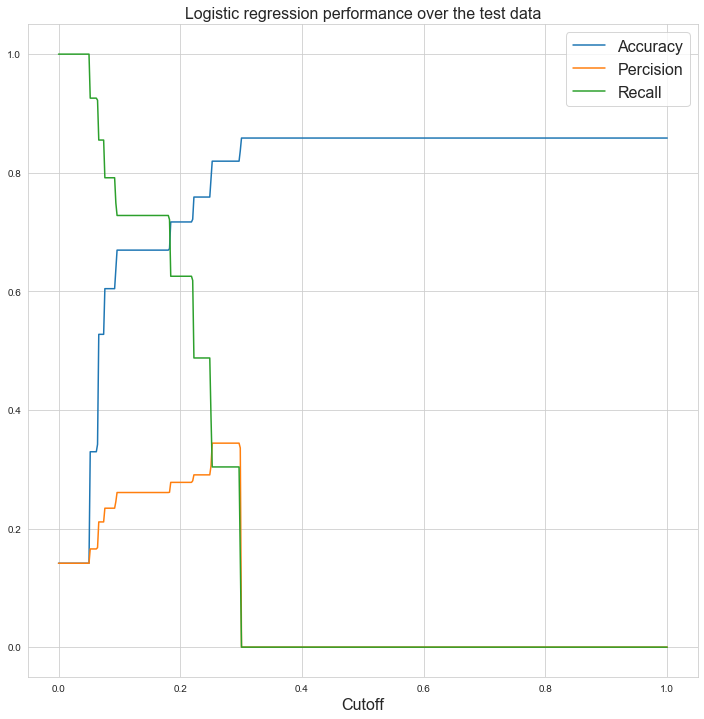

In [13]:
plt.figure(figsize = (12,12))

plt.xlabel("Cutoff",fontsize = 16)
plt.title("Logistic regression performance over the test data",fontsize = 16)

plt.plot(cutoffs,acc,'-',label="Accuracy")
plt.plot(cutoffs,percision,'-',label="Percision")
plt.plot(cutoffs,recall,'-',label="Recall")

plt.legend(fontsize = 16)
plt.show()

In the above graph, performance measure for different cutoff values are shown. 

Graph discontinuity reflects the limited variation in our data points and each change represents inclusion or exclusion of a new group to our predicted desirable groups. 

Note that, for cuttoff values greater than ~0.3 the accuracy becomes constant. It's due to the model predicting only zeros as outcome which is by the way true 85% of times but is not of our interest. 

The best performance measure here if we are looking to maximize the likelihood of receiving ones in  output would be the percision measure. It peaks at about $0.35$. This number reflects the highest ratio of clicks over ads shown we can get by bidding $10 for the group represented by: `currently_insured= N` , `marital_status= S` , `number_of_vehicles= 1` , and `number_of_drivers= 2`

The cutoff value needed to separate this group is $0.27$

### Decision Trees

In [14]:
# Import packages
# tree will be used to plot the decisiton tree
from sklearn import tree

# This is the actual out of the box algorithm
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Make an decisiion tree object
tree_clf = DecisionTreeClassifier(random_state = 316,max_depth = 2)

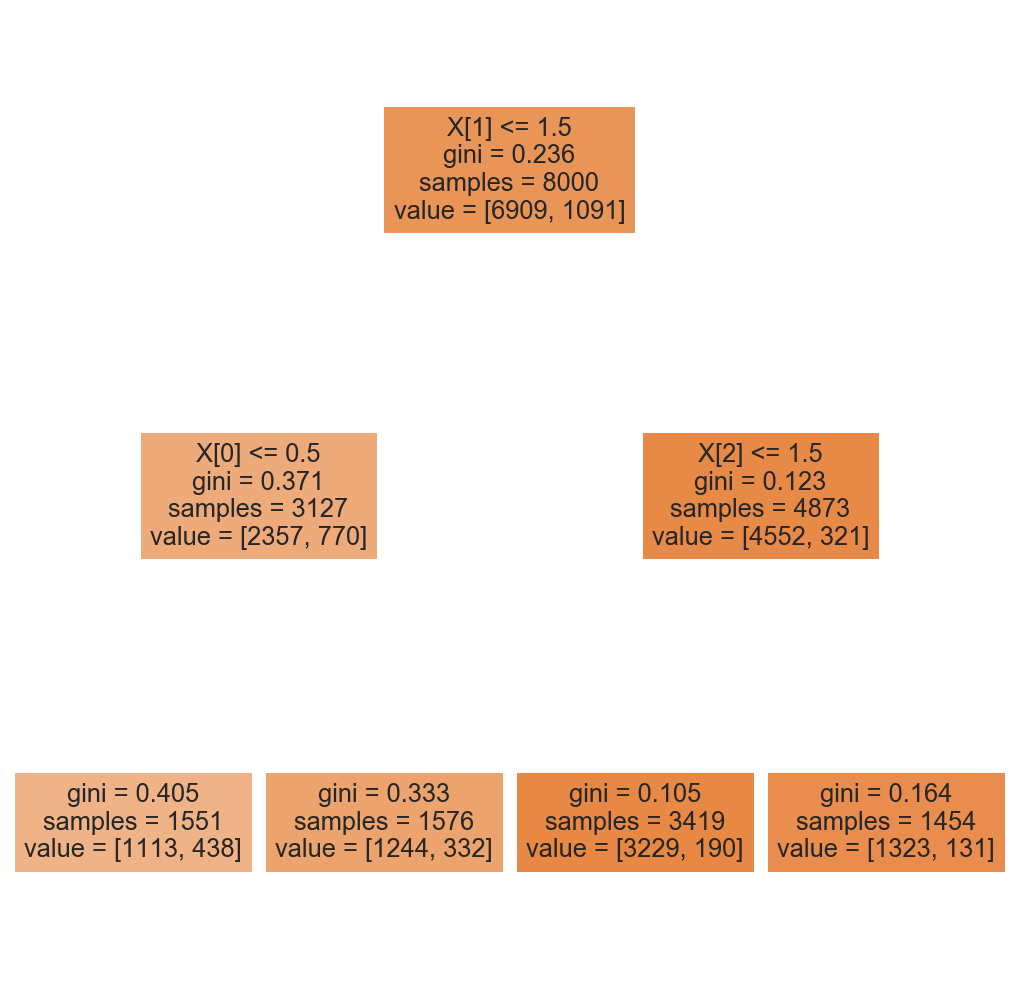

In [16]:
plt.figure(figsize = (18,18))
# Plot the fitted tree
fig = tree_clf.fit(X_train, y_train)
tree.plot_tree(fig,filled = True)
plt.show()


Let's take a look at performance of decision trees

In [17]:
N=500
cutoffs=np.linspace(0,1,N)
acc=[]
percision=[]
recall=[]
y_prob_pred=tree_clf.predict_proba(X_test)[:,1]

for i in range(N):
    
    acc_i, percision_i, recall_i = performance_measures(y_test,y_prob_pred,cutoffs[i])
    acc.append(acc_i)
    percision.append(percision_i)
    recall.append(recall_i)


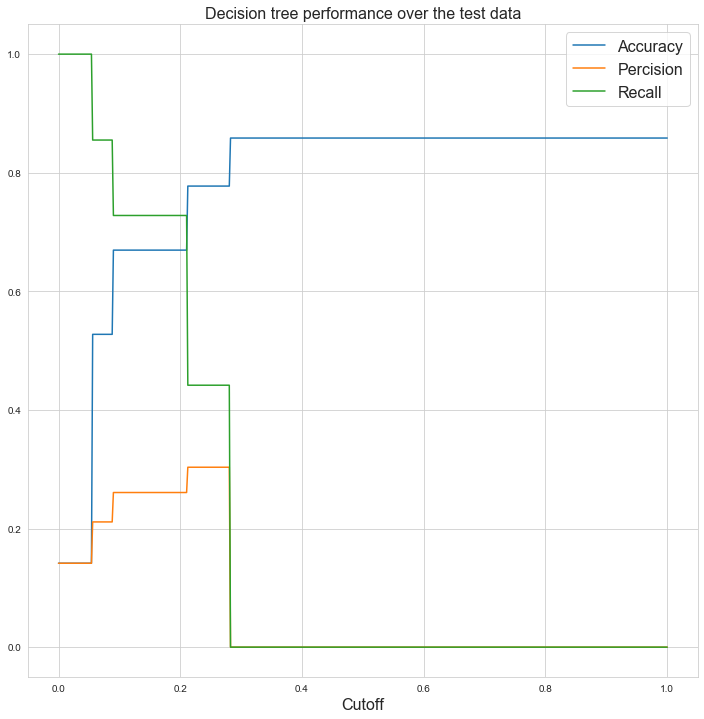

In [18]:
plt.figure(figsize = (12,12))

plt.xlabel("Cutoff",fontsize = 16)
plt.title("Decision tree performance over the test data",fontsize = 16)

plt.plot(cutoffs,acc,'-',label="Accuracy")
plt.plot(cutoffs,percision,'-',label="Percision")
plt.plot(cutoffs,recall,'-',label="Recall")

plt.legend(fontsize = 16)
plt.show()

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth = 3)

In [20]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Let's take a look at performance of random forest

In [21]:
N=500
cutoffs=np.linspace(0,1,N)
acc=[]
percision=[]
recall=[]
y_prob_pred=forest_clf.predict_proba(X_test)[:,1]

for i in range(N):
    
    acc_i, percision_i, recall_i = performance_measures(y_test,y_prob_pred,cutoffs[i])
    acc.append(acc_i)
    percision.append(percision_i)
    recall.append(recall_i)

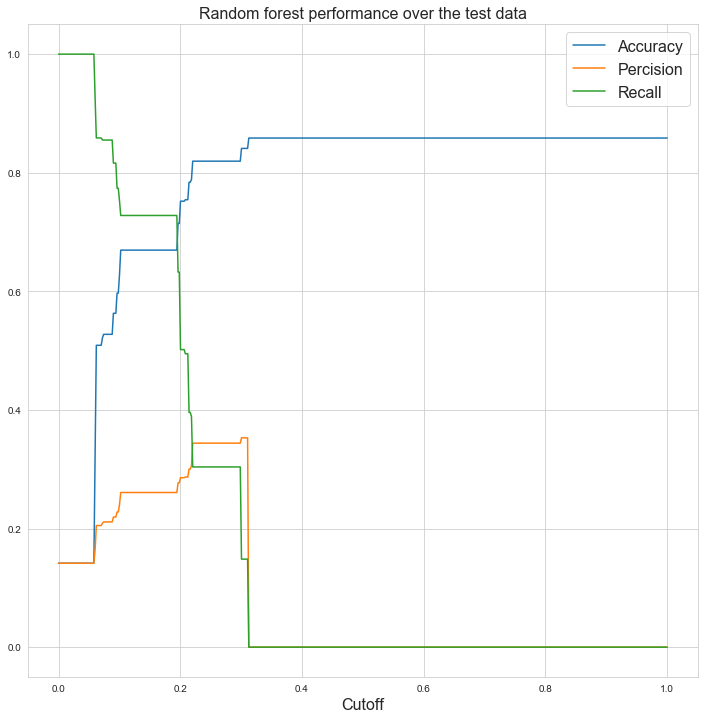

In [22]:
plt.figure(figsize = (12,12))

plt.xlabel("Cutoff",fontsize = 16)
plt.title("Random forest performance over the test data",fontsize = 16)

plt.plot(cutoffs,acc,'-',label="Accuracy")
plt.plot(cutoffs,percision,'-',label="Percision")
plt.plot(cutoffs,recall,'-',label="Recall")

plt.legend(fontsize = 16)
plt.show()

### Multilayer Perceptron

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(500,),max_iter=1000)

In [25]:
mlp_clf=mlp.fit(X_train,y_train)

Let's take a look at performance of MLP

In [26]:
N=500
cutoffs=np.linspace(0,1,N)
acc=[]
percision=[]
recall=[]
y_prob_pred=mlp_clf.predict_proba(X_test)[:,1]

for i in range(N):
    
    acc_i, percision_i, recall_i = performance_measures(y_test,y_prob_pred,cutoffs[i])
    acc.append(acc_i)
    percision.append(percision_i)
    recall.append(recall_i)

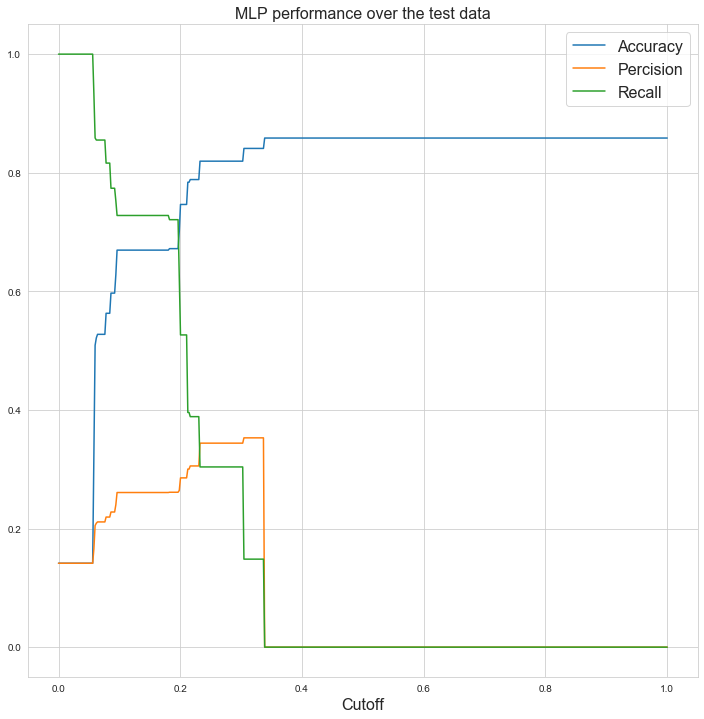

In [27]:
plt.figure(figsize = (12,12))

plt.xlabel("Cutoff",fontsize = 16)
plt.title("MLP performance over the test data",fontsize = 16)

plt.plot(cutoffs,acc,'-',label="Accuracy")
plt.plot(cutoffs,percision,'-',label="Percision")
plt.plot(cutoffs,recall,'-',label="Recall")

plt.legend(fontsize = 16)
plt.show()

What is left to do: 

costumers with two cars worth twice as other costumers

histograms of ranks for each group vs our simulated histograms 

We estimate the distribution of bids through which the bid values of our four competitors are drawn for each of these 16 groups. ( to be explained later)

we estimate the optimal bid for each group